In [ ]:
#Ver1.과의 차이점 

#특성추가 : Age_cat, Name_Len, Have_Cabin, Fare_Len
#Title 두가지로 정리 : Mr, Mrs 

# Step 3: Prepare Data for Consumption

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
t_train = pd.read_csv('../data/Titanic/train.csv')
t_test = pd.read_csv('../data/Titanic/test.csv')

In [243]:
#두 파일을 묶어 데이터 전처리 준비
data_cleaner = [t_train, t_test]

In [244]:
t_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [245]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
#결측치 제거
for dataset in data_cleaner:    
    #결측치를 중간값으로 대체
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #결측치를 가장 많은 빈도의 항구로 대체
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #결측치를 중간값으로 대체
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    #결측치를 0으로 대체
    dataset['Cabin'].fillna(0, inplace = True)

In [247]:
#상호작용/다항식 추가
for dataset in data_cleaner :    
    #가족 수 컬럼 생성 : 부모님 + 형제 자매 + 자신
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    #객실 여부 컬럼 생성 : 객실이 있으면 1, 없으면 0
    dataset['Have_Cabin'] = 1
    dataset['Have_Cabin'].loc[dataset['Cabin'] == 0 ] = 0
    
    #혼자 여행 여부 추가 : 혼자면 1, 가족이 있으면 0
    dataset['IsAlone'] = 1 
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0  

    #타이틀만 가져와서 칼럼 생성
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    #나이별 카테고리 칼럼 생성
    dataset['age_cat'] = pd.cut(dataset['Age'], 
                             bins=[0, 3, 7, 15, 30, 60, 100], 
                             include_lowest=True, 
                             labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old']) 
   
    #이름 길이 컬럼 추가
    for i in data_cleaner :
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
    
    #티겟값 길이 추가
    for i in data_cleaner :
        i['Fare_Str'] = i['Fare'].apply(lambda x: str(x))
        i['Fare_Len'] = i['Fare_Str'].apply(lambda x: len(x))

C:\Users\a\Anaconda3\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [249]:
#타이틀 정리하기
male = ['Capt', 'Col', 'Don',  'Dr', 'Jonkheer',  'Major', 'Master', 'Mr', 'Rev', 'Sir']
for dataset in data_cleaner :
    for i in range(0, len(dataset)) :
        if dataset['Title'][i] in male:
            dataset['Title'][i]  = 'Mr'
        else : 
            dataset['Title'][i] = 'Mrs'

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [250]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Have_Cabin,IsAlone,Title,age_cat,Name_Len,Fare_Str,Fare_Len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,2,0,0,Mr,young,23,7.25,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,Mrs,adult,51,71.2833,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,1,Mrs,young,22,7.925,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,0,Mrs,adult,44,53.1,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1,0,1,Mr,adult,24,8.05,4
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,0,Q,1,0,1,Mr,young,16,8.4583,6
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,1,Mr,adult,23,51.8625,7
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S,5,0,0,Mr,baby,30,21.075,6
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S,3,0,0,Mrs,young,49,11.1333,7
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C,2,0,0,Mrs,teenage,35,30.0708,7


In [251]:
#타겟값 설정
t_train.target = t_train['Survived']

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [252]:
#필요없는 컬럼 제거
drop_column = ['PassengerId','Cabin', 'Ticket', 'Name', 'Fare_Str']
for dataset in data_cleaner : 
    dataset.drop(drop_column, axis=1, inplace = True)

In [253]:
t_train.data = t_train.drop("Survived", axis = 1)

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [254]:
t_train.data.shape

(891, 14)

In [255]:
data_dummies = pd.get_dummies(t_train.data)

In [256]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
Pclass              891 non-null int64
Age                 891 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Fare                891 non-null float64
FamilySize          891 non-null int64
Have_Cabin          891 non-null int64
IsAlone             891 non-null int64
Name_Len            891 non-null int64
Fare_Len            891 non-null int64
Sex_female          891 non-null uint8
Sex_male            891 non-null uint8
Embarked_C          891 non-null uint8
Embarked_Q          891 non-null uint8
Embarked_S          891 non-null uint8
Title_Mr            891 non-null uint8
Title_Mrs           891 non-null uint8
age_cat_baby        891 non-null uint8
age_cat_children    891 non-null uint8
age_cat_teenage     891 non-null uint8
age_cat_young       891 non-null uint8
age_cat_adult       891 non-null uint8
age_cat_old         891 non-null 

In [257]:
print(t_test.shape)

(418, 14)


# Step 4: Perform Exploratory Analysis with Statistics

In [163]:
t_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [162]:
#성별 별 평균 생존률
t_train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [164]:
t_train.groupby('Title')['Survived'].mean()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [121]:
train_clean = pd.concat([t_train.data, t_train.target], axis=1)

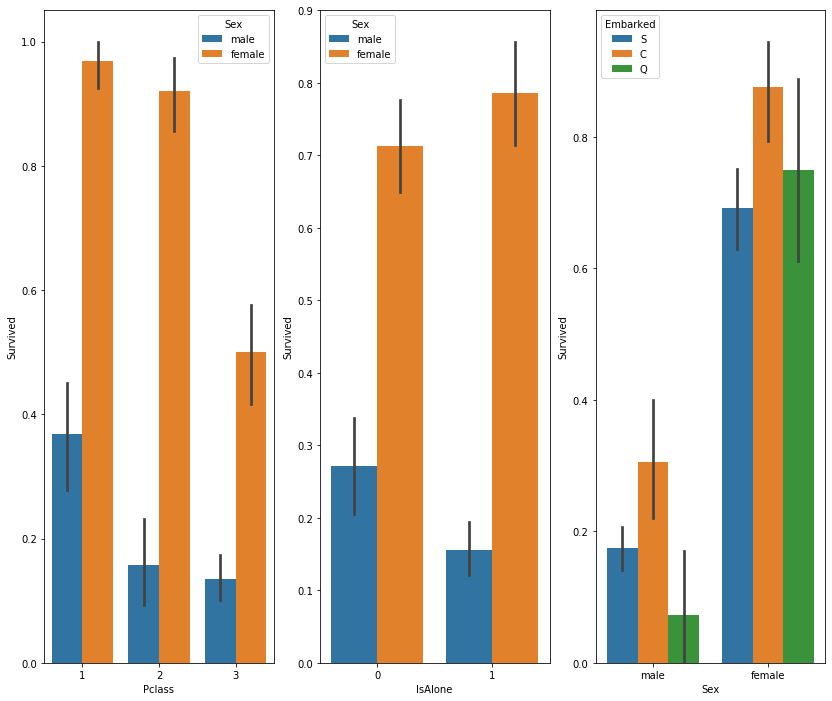

In [131]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))
sns.barplot(x = 'Pclass', y = 'Survived', data = train_clean, hue = 'Sex',ax = qaxis[0])
sns.barplot(x = 'IsAlone', y = 'Survived', data = train_clean, hue = 'Sex',ax = qaxis[1])
sns.barplot(x = 'Sex', y = 'Survived', data = train_clean, hue = 'Embarked',ax = qaxis[2])

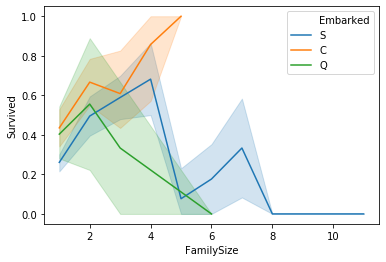

In [133]:
sns.lineplot(x = 'FamilySize', y = 'Survived',hue = 'Embarked', data = train_clean)

# Step 5: Model Data

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_dummies, t_train.target, random_state = 0)

In [259]:
print(X_train.shape)
print(X_test.shape)

(668, 23)
(223, 23)


In [260]:
#결정트리
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)

tree.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 0.853
테스트 세트 점수: 0.812


In [261]:
#결정트리 시각화
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ['dead', 'alive'],
                feature_names = data_dummies.columns, impurity = False, filled = True)

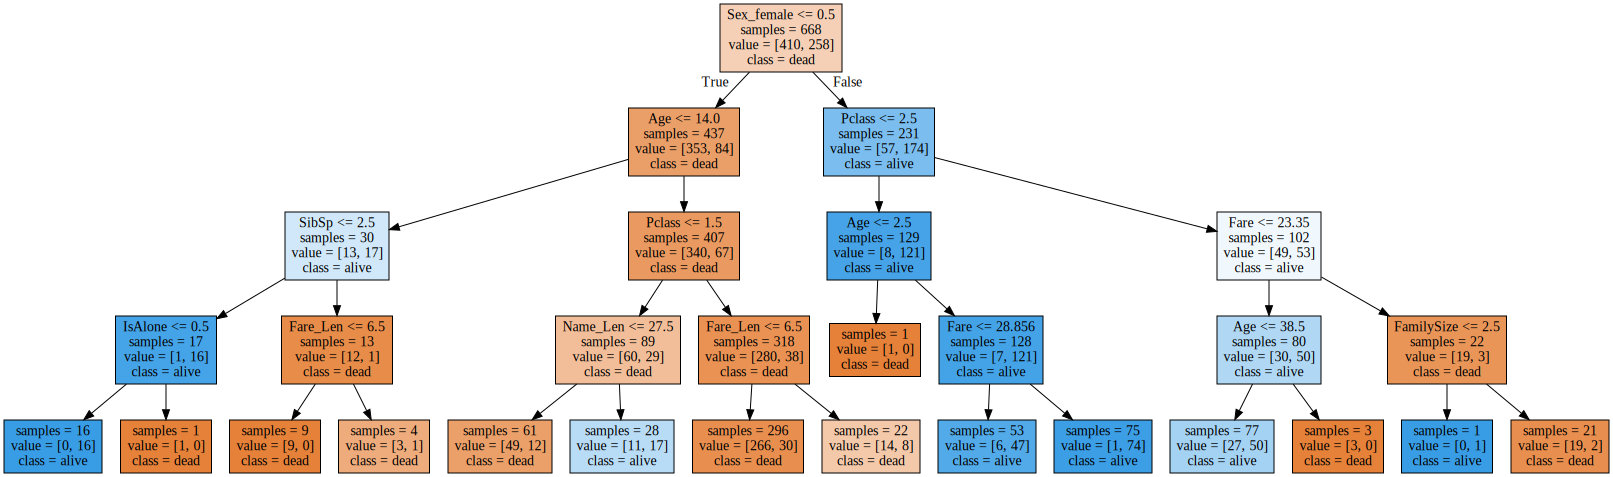

In [262]:
import graphviz

with open(("tree.dot"), 'r', encoding = "utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [263]:
#랜덤포레스트 적용
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 2) 
forest.fit(data_dummies, t_train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [264]:
print("훈련 세트 점수: {:.3f}".format(forest.score(data_dummies, t_train.target)))
#print("테스트 세트 점수: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 0.975


In [265]:
#나무 수 20개로 변경
forest = RandomForestClassifier(n_estimators = 20, random_state = 2) 
forest.fit(data_dummies, t_train.target)
print("훈련 세트 점수: {:.3f}".format(forest.score(data_dummies, t_train.target)))
#print("테스트 세트 점수: {:.3f}".format(forest.score(X_test, y_test)))  

훈련 세트 점수: 0.996


# Step 6: Validate and Implement

In [266]:
t_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Len,Fare_Len,FamilySize,Have_Cabin,IsAlone,Title,age_cat
0,3,male,34.5,0,0,7.8292,Q,16,6,1,0,1,Mr,adult
1,3,female,47.0,1,0,7.0000,S,32,3,2,0,0,Mrs,adult
2,2,male,62.0,0,0,9.6875,Q,25,6,1,0,1,Mr,old
3,3,male,27.0,0,0,8.6625,S,16,6,1,0,1,Mr,young
4,3,female,22.0,1,1,12.2875,S,44,7,3,0,0,Mrs,young
5,3,male,14.0,0,0,9.2250,S,26,5,1,0,1,Mr,teenage
6,3,female,30.0,0,0,7.6292,Q,20,6,1,0,1,Mrs,young
7,2,male,26.0,1,1,29.0000,S,28,4,3,0,0,Mr,young
8,3,female,18.0,0,0,7.2292,C,41,6,1,0,1,Mrs,young
9,3,male,21.0,2,0,24.1500,S,23,5,3,0,0,Mr,young


In [267]:
data_dummies2 = pd.get_dummies(t_test)

In [268]:
data_dummies2.shape

(418, 23)

In [269]:
print(data_dummies.shape)
print(data_dummies2.shape)

(891, 23)
(418, 23)


In [270]:
predictions = forest.predict(data_dummies2)

In [271]:
predictions = pd.DataFrame(predictions, columns=['Survived'])

In [272]:
test = pd.read_csv('../data/Titanic/test.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('y_test_ver_2.csv', sep=",", index = False)

In [ ]:
#score : 0.78468  ==> ver1보다 정확도 0.5 향상